In [1]:
# %load ../../../load_magic/storage1.py

current_directory = !echo %cd%
folder_list = current_directory[0].split('\\')
%run ../../../load_magic/storage2.py {len(folder_list) - folder_list.index('ipynb')}
%who

data_folder = ../../data/
saves_folder = ../../saves/
attempt_to_pickle	 current_directory	 data_folder	 encoding	 folder_list	 load_csv	 load_dataframes	 load_object	 os	 
pd	 pickle	 save_dataframes	 saves_folder	 store_objects	 sys	 


In [2]:

import numpy as np
import statsmodels.api
import statsmodels.formula.api as smf

C:\Users\dev\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:

# Bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [5]:

# Call in data set
gapminder_df = load_object('gapminder_df')

In [7]:

gapminder_df.columns = ['country_name', 'income_per_person', 'alcohol_consumption', 'armed_forces_rate',
                        'breast_cancer_per100th', 'co2_emissions', 'female_employ_rate', 'hiv_rate',
                        'internet_use_rate', 'life_expectancy', 'oil_per_person', 'polity_score',
                        'electricity_per_person', 'suicide_per100th', 'employ_rate', 'urban_rate']

In [8]:

# Convert variables to numeric format using convert_objects function
gapminder_df['internet_use_rate'] = pd.to_numeric(gapminder_df['internet_use_rate'], errors='coerce')
gapminder_df['urban_rate'] = pd.to_numeric(gapminder_df['urban_rate'], errors='coerce')

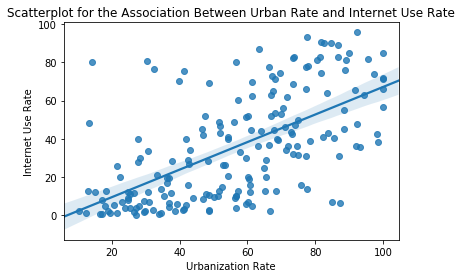

In [15]:

import seaborn
import matplotlib as plt
%matplotlib inline

scat1 = seaborn.regplot(x='urban_rate', y='internet_use_rate', scatter=True, data=gapminder_df)
xlabel_text = scat1.set_xlabel('Urbanization Rate')
ylabel_text = scat1.set_ylabel('Internet Use Rate')
title_text = scat1.set_title('Scatterplot for the Association Between Urban Rate and Internet Use Rate')

In [17]:

print('OLS regression model for the association between urban rate and internet use rate')
reg1 = smf.ols('internet_use_rate ~ urban_rate', data=gapminder_df).fit()
print(reg1.summary())

OLS regression model for the association between urban rate and internet use rate
                            OLS Regression Results                            
Dep. Variable:      internet_use_rate   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sat, 03 Mar 2018   Prob (F-statistic):           4.56e-21
Time:                        21:25:43   Log-Likelihood:                -856.14
No. Observations:                 190   AIC:                             1716.
Df Residuals:                     188   BIC:                             1723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------